In [2]:
import os
os.chdir('/Users/mac/Desktop/Work Space/Safe PM 2')

In [3]:
from datamanager import DataManager
from trainer import Trainer
from tester import Tester
from viz import Viz

import numpy as np
import torch
import utils

np.random.seed(1)
torch.manual_seed(1)
utils.SAVE_DIR += f"/seed{1}"

In [18]:
train_start = "2014-01-02"
train_end = "2020-12-31"
test_start = "2020-12-31"
test_end = "2022-12-31"

paths = ["Data/" + s for s in ["REGN", "TIGO", "JD"]]
datamanager = DataManager(paths, train_start, train_end, test_start, test_end)
train_data_tensor, test_data_tensor = datamanager.get_data_tensor()

K = train_data_tensor.shape[2]
F = train_data_tensor.shape[1]-1

In [57]:
parameters = {
            "lr1":1e-4, 
            "lr2":1e-3, 
            "tau":0.005, 
            "delta":0., 
            "alpha":1.0,
            "gamma":0.9,
            "K":K, "F":F, 
            "fee":0.0, 
            "term":30,
            "freq":500,
            "cons":True,
            "balance":12000, 
            "holding":1, 
            "episode":500,
            "min_trading_price":0,
            "max_trading_price":400,
            "batch_size":128,
            "memory_size":10000
            }

In [58]:
trainer = Trainer(**parameters, data=train_data_tensor)
trainer.train()
trainer.save_model(utils.SAVE_DIR + "/net.pth")

epi:0
cum cost:1140
cum reward:742.5996160167731
score r:742.5996160167731
score c:1140.0
cushion:0.0355885902474693
a:[-0.00390265  0.46981065 -0.30360445]
c:0
alpha:tensor([[1.3550, 2.1411, 1.1169, 1.7715]])
log prob:1.4657796621322632
value:tensor([[1.1473]])
const:6.902691187114759
lam:0.0204902985945948
lam_grad:-5.902691187114759
cum_fee:0.0
portfolio:[0.14091308 0.15410396 0.50680237 0.19818059]
profitloss:133.6475010579874
loss:-0.2802428603172302

epi:1
cum cost:1240
cum reward:498.7237043790023
score r:620.6616601978877
score c:1190.0
cushion:0.029354593612683333
a:[-0.11184503  0.13293229  0.24741805]
c:0
alpha:tensor([[1.3166, 2.1203, 1.0444, 1.7837]])
log prob:2.381467819213867
value:tensor([[2.3104]])
const:7.500959351211302
lam:0.044205485635159664
lam_grad:-6.500959351211302
cum_fee:0.0
portfolio:[0.06142412 0.29145406 0.24197059 0.40515123]
profitloss:132.75013102641395
loss:-0.07888877391815186

epi:2
cum cost:1170
cum reward:850.2747584391317
score r:697.199359611635

In [ ]:
tester = Tester(**parameters, data=datamanager.get_data_tensor()[1])
tester.test(utils.SAVE_DIR + "/net.pth")

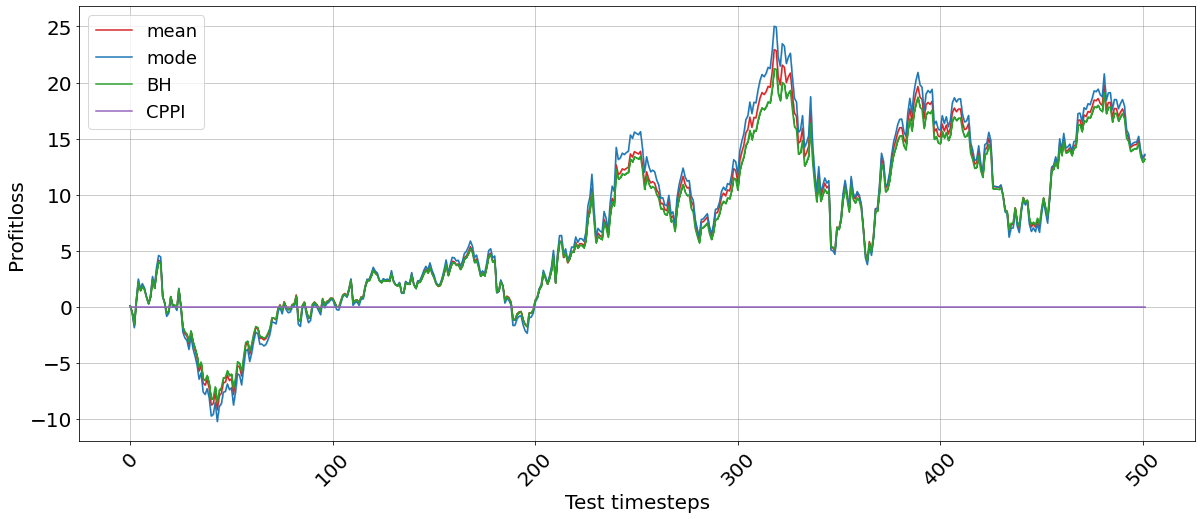

mean profitloss: 13.533798722540592
mode profitloss: 13.59859907915919
BH profitloss: 13.203243829004265
CPPI profitloss: 0.0


In [66]:
viz = Viz()
viz.show(1, 1, size=(20,8))